In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [82]:
df_train = pd.read_csv('train/X_train.txt', delim_whitespace=True, header=None)
df_test = pd.read_csv('test/X_test.txt', delim_whitespace=True, header=None)

combine = pd.concat([df_train, df_test])

# X = combine.values
y_train = np.array(pd.read_csv('train/y_train.txt', header=None)).ravel()
y_test = np.array(pd.read_csv('test/y_test.txt', header=None)).ravel()
df_train.shape, df_test.shape, combine.shape

stdScaler = StandardScaler()
X = stdScaler.fit_transform(combine.values)
X_train = stdScaler.fit_transform(df_train.values)
X_test = stdScaler.fit_transform(df_test.values)

# Applying PCA

Since, the number of attributes is very large, we are applying **PCA** to reduce the dimensions of feature vector.

In [83]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90, random_state=42)  # choosing variance to be 0.9
pca = pca.fit(X_train)
Xtrain_pca = pca.transform(X_train)
Xtest_pca = pca.transform(X_test)
Xtrain_pca.shape

(7352, 63)

array([0.50781172, 0.57361853, 0.60168289, 0.62672242, 0.64560527,
       0.66284534, 0.67655545, 0.68854623, 0.69850482, 0.70815569,
       0.7167562 , 0.72475901, 0.73239898, 0.73885227, 0.74517551,
       0.75117273, 0.75704023, 0.76279431, 0.76847352, 0.77374648,
       0.77875011, 0.78363419, 0.78841625, 0.79310188, 0.79759477,
       0.80180504, 0.80598483, 0.81004053, 0.81392577, 0.81779595,
       0.82145554, 0.82500108, 0.8284805 , 0.83185237, 0.83514914,
       0.83843129, 0.84163659, 0.84459274, 0.84745996, 0.85031071,
       0.85299837, 0.85565457, 0.85828863, 0.86087714, 0.86336768,
       0.86583722, 0.86824402, 0.87060517, 0.87290796, 0.87518364,
       0.87738528, 0.87951995, 0.881597  , 0.88362196, 0.88561976,
       0.88759726, 0.88954   , 0.89144237, 0.89332302, 0.89518518,
       0.89699985, 0.89877366, 0.90053451])

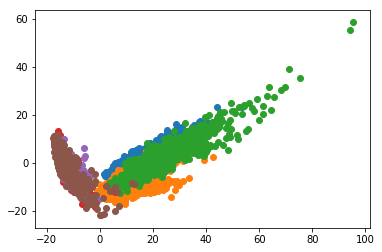

In [84]:
display(pca.explained_variance_ratio_.cumsum())
for i in range(1, 7) :
    plt.scatter(Xtrain_pca[y_train == i, 0], Xtrain_pca[y_train == i, 1])
plt.show()

In [85]:
stdScaler = StandardScaler()
X_train = stdScaler.fit_transform(Xtrain_pca)
X_test = stdScaler.fit_transform(Xtest_pca)

In [86]:
d=[0.001, 0.003, 0.006, 0.01,0.03,0.06,0.1,0.3,0.6, 1, 3, 10]

# Logistic Regression 

In [87]:
from sklearn.linear_model import LogisticRegression

### Using Liblinear as *sovler*

For multiclass problems, **Liblinear** uses one-versus-rest schemes.

In [96]:
max_train = 0
max_test = 0
optimalC = d[0]
for i in d:
    
    clf = LogisticRegression(C=i, penalty='l2', random_state=42)
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    
#     print(i, score_train)
#     print(i, score_test)
    
#     print('-'*25)
    if(score_test > max_test) :
        max_test = score_test
        max_train = score_train
        optimalC = i

print("Optimal C = ", optimalC)
print("Training score by Logistic Regression (liblinear) : ", max_train)
print("Test score by Logistic Regression (liblinear) : ", max_test)

Optimal C =  0.3
Training score by Logistic Regression (liblinear) :  0.9473612622415669
Test score by Logistic Regression (liblinear) :  0.9226331862911435


### Using saga as solver

For multiclass problems, '**Saga**' handle multinomial loss.

In [89]:
max_train = 0
max_test = 0
optimalC = d[0]
for i in d:
    
    clf = LogisticRegression(C=i, penalty='l2', max_iter=100, solver='saga',
                             multi_class='multinomial', random_state=42)
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    
#     print('-'*25)
#     print(i, score_train)
#     print(i, score_test)
    
    if(score_test > max_test) :
        max_test = score_test
        max_train = score_train
        optimalC = i

print("Optimal C = ", optimalC)
print("Training score by Logistic Regression (Saga) : ", max_train)
print("Test score by Logistic Regression (Saga) : ", max_test)

/home/kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Optimal C =  0.03
Training score by Logistic Regression (Saga) :  0.948177366702938
Validation score by Logistic Regression (Saga) :  0.9212758737699356


 # SVM 

In [90]:
from sklearn.svm import SVC

max_train = 0
max_test = 0
svc_list = [1] + [i for i in range(5, 51, 5)]
optimalC = svc_list[0]
for i in svc_list:
    
    clf = SVC(C=i, kernel='rbf', random_state=42)
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    
#     print(i, score_train)
#     print(i, score_test)
    
#     print('-'*25)
    if(score_test > max_test) :
        max_test = score_test
        max_train = score_train
        optimalC = i

print("Optimal C = ", optimalC)
print("Training score by SVM : ", max_train)
print("Test score by SVM : ", max_test)

Optimal C =  5
Training score by SVM :  0.9953754080522307
Validation score by SVM :  0.9202578893790295


In [91]:
from sklearn.svm import SVC

max_train = 0
max_test = 0
svc_list = [1] + [i for i in range(5, 51, 5)]
optimalC = svc_list
for i in svc_list:
    
    clf = SVC(C=i, kernel='linear', random_state=42)
    clf.fit(Xtrain_pca, y_train)
    score_train = clf.score(Xtrain_pca, y_train)
    score_test = clf.score(Xtest_pca, y_test)
    
#     print(i, score_train)
#     print(i, score_test)
    
#     print('-'*25)
    if(score_test > max_test) :
        max_test = score_test
        max_train = score_train
        optimalC = i

print("Optimal C = ", optimalC)
print("Training Error by SVM : ", max_train)
print("Test Error by SVM : ", max_test)

Optimal C =  1
Training Error by SVM :  0.9707562568008705
Validation Error by SVM :  0.9015948422124194


In [98]:
from sklearn.ensemble import RandomForestClassifier
max_train = 0
max_test = 0
optimalDepth = 7
optimalEstimator = 10
for depth in [7, 8, 9] :
    for estimator in range(10, 51) :
        model_rfc = RandomForestClassifier(n_estimators=estimator, max_depth=depth)
        model_rfc.fit(X_train, y_train)
        score_train = model_rfc.score(X_train, y_train)
        score_test = model_rfc.score(X_test, y_test)
#         print("Training Score for %d and %d ", depth, estimator, " : ", train_score)
#         print("Validation Score for %d and %d ", depth, estimator," : ", val_score)
        if(max_test < score_test) :
            max_test = score_test
            max_train = score_train
            optimalDepth = depth
            optimalEstimator = estimator
            print("depth, estimator = ", depth, estimator)
            
print("Optimal Depth = ", optimalDepth)
print("Optimal Number of Estimatos = ", optimalEstimator)
print("Training Score by Random Forest : ", max_train)
print("Test Score by Random Forest : ", max_test)

depth, estimator =  7 10
depth, estimator =  7 16
depth, estimator =  7 25
depth, estimator =  7 28
depth, estimator =  7 39
depth, estimator =  7 43
depth, estimator =  7 45
depth, estimator =  7 50
depth, estimator =  8 22
depth, estimator =  9 45
depth, estimator =  9 49
Optimal Depth =  9
Optimal Number of Estimatos =  49
Training Score by SVM :  0.9646354733405876
Test Score by SVM :  0.8717339667458432
